11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


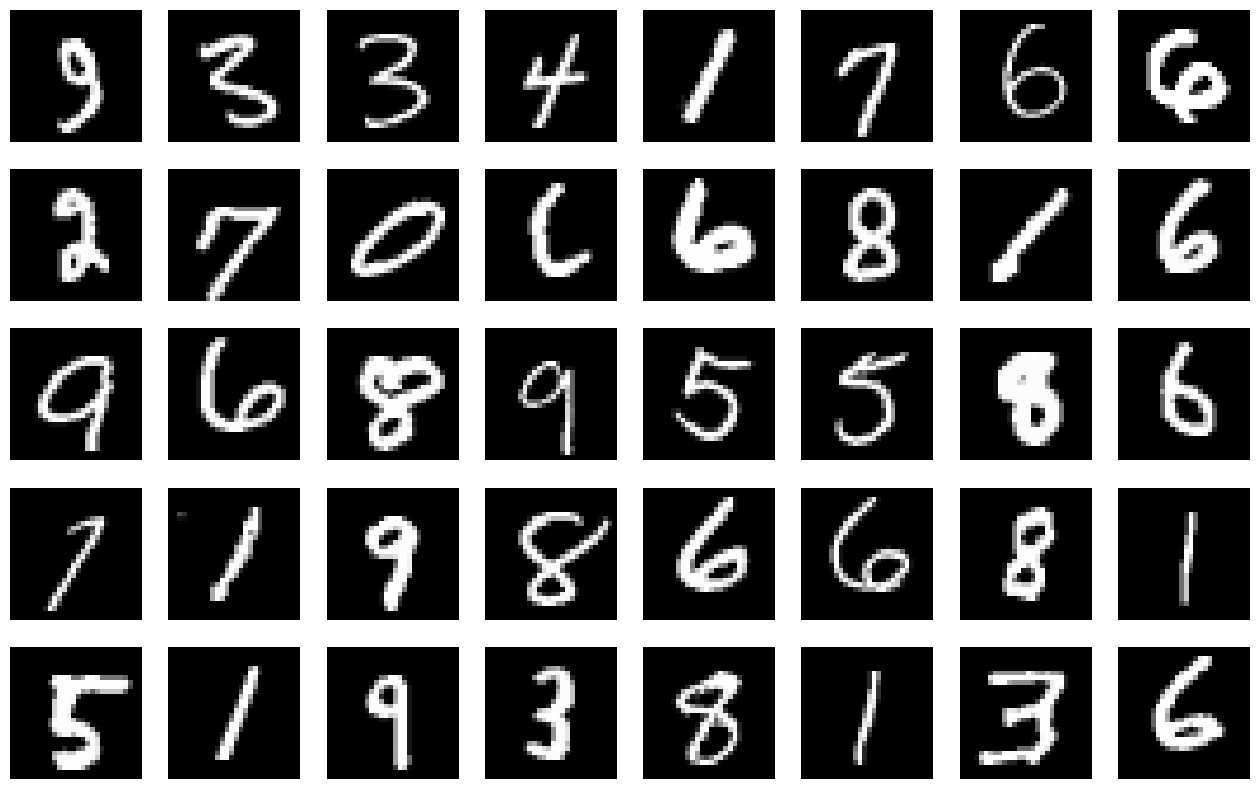

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
from random import randrange
plt.figure(figsize=(16,10),facecolor='white')
for i in range(5):
  for j in range(8):
    index=randrange(60000)
    plt.subplot(5,8,i*8+j+1)
    plt.axis('off')
    plt.imshow(x_train[index],cmap='gray')
plt.show()

In [2]:
import tensorflow as tf
print('轉換為CNN所需的規格，多加上一維')
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
print(x_train.shape)
print(x_test.shape)
print('將圖像特徵縮放在0到1之間')
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
print(x_train)
category=10 #分類的結果是10個
y_train2=tf.keras.utils.to_categorical(y_train,category)
y_test2=tf.keras.utils.to_categorical(y_test,category)
print(y_train.shape)
print(y_test.shape)
print(y_train2.shape)
print(y_test2.shape)

轉換為CNN所需的規格，多加上一維
(60000, 28, 28, 1)
(10000, 28, 28, 1)
將圖像特徵縮放在0到1之間
[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   

In [3]:
print('建構CNN模型，並進行訓練')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
model=tf.keras.models.Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

建構CNN模型，並進行訓練


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221,994 (867.16 KB)

 Trainable params: 221,994 (867.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 70s 145ms/step - accuracy: 0.7922 - loss: 0.6327 - val_accuracy: 0.9759 - val_loss: 0.0703
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 144ms/step - accuracy: 0.9804 - loss: 0.0660 - val_accuracy: 0.9838 - val_loss: 0.0460
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 145ms/step - accuracy: 0.9857 - loss: 0.0462 - val_accuracy: 0.9886 - val_loss: 0.0327
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 143ms/step - accuracy: 0.9894 - loss: 0.0345 - val_accuracy: 0.9874 - val_loss: 0.0361
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 140ms/step - accuracy: 0.9916 - loss: 0.0265 - val_accuracy: 0.9898 - val_loss: 0.0314
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 137ms/step - accuracy: 0.9934 - loss: 0.0222 - val_accuracy: 0.9890 - val_loss: 0.0319
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 67s 143ms/step - accuracy: 0.9941 - loss: 0.0184 - val_accuracy: 0.9887 - val_loss: 0.0362
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 67s 143ms/step - accuracy: 0.9951 - loss: 0

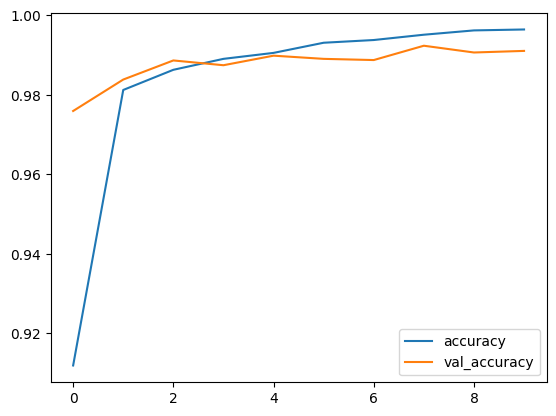

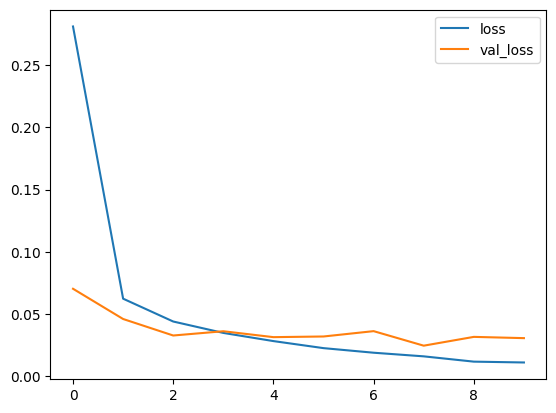

In [4]:
history=model.fit(x_train,y_train2,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test2),validation_split=0.2)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [5]:
print('建構CNN模型，並進行訓練')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
model=tf.keras.models.Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(filters=40,kernel_size=(2,2),padding='same',activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=40,kernel_size=(2,2),padding='same',activation='relu'))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

建構CNN模型，並進行訓練


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 40)     │         5,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 40)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 40)     │         6,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7840)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │       784,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 817,230 (3.12 MB)

 Trainable params: 817,230 (3.12 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 105s 218ms/step - accuracy: 0.8488 - loss: 0.4942 - val_accuracy: 0.9775 - val_loss: 0.0693
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 139s 212ms/step - accuracy: 0.9817 - loss: 0.0577 - val_accuracy: 0.9869 - val_loss: 0.0396
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 100s 212ms/step - accuracy: 0.9886 - loss: 0.0357 - val_accuracy: 0.9886 - val_loss: 0.0346
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 212ms/step - accuracy: 0.9913 - loss: 0.0269 - val_accuracy: 0.9841 - val_loss: 0.0559
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 213ms/step - accuracy: 0.9937 - loss: 0.0186 - val_accuracy: 0.9852 - val_loss: 0.0508
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 212ms/step - accuracy: 0.9960 - loss: 0.0132 - val_accuracy: 0.9882 - val_loss: 0.0384
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 212ms/step - accuracy: 0.9955 - loss: 0.0134 - val_accuracy: 0.9891 - val_loss: 0.0369
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 147s 223ms/step - accuracy: 0.9964 -

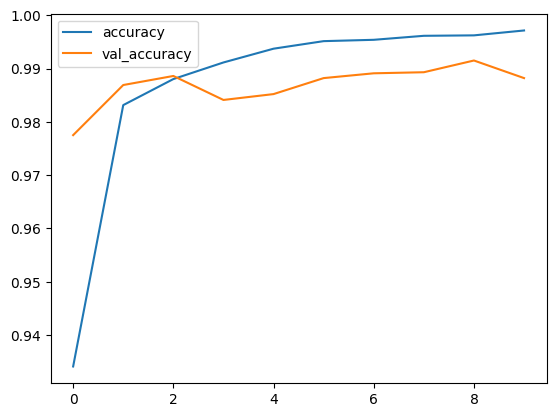

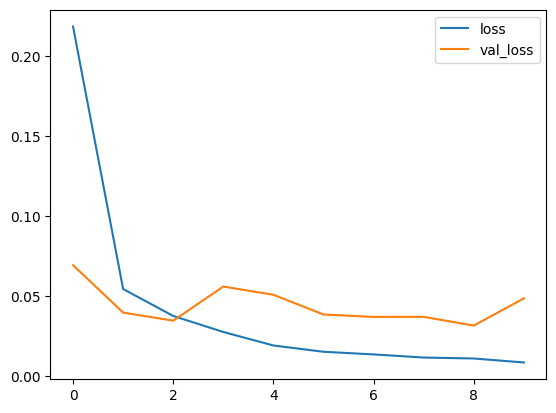

In [6]:
history=model.fit(x_train,y_train2,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test2),validation_split=0.2)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [7]:
print('建構CNN模型，並進行訓練')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
model=tf.keras.models.Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

建構CNN模型，並進行訓練


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221,994 (867.16 KB)

 Trainable params: 221,994 (867.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 70s 145ms/step - accuracy: 0.7787 - loss: 0.7131 - val_accuracy: 0.9751 - val_loss: 0.0796
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 138ms/step - accuracy: 0.9712 - loss: 0.0974 - val_accuracy: 0.9846 - val_loss: 0.0426
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 66s 141ms/step - accuracy: 0.9826 - loss: 0.0619 - val_accuracy: 0.9880 - val_loss: 0.0369
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 144ms/step - accuracy: 0.9862 - loss: 0.0470 - val_accuracy: 0.9892 - val_loss: 0.0361
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 143ms/step - accuracy: 0.9877 - loss: 0.0392 - val_accuracy: 0.9898 - val_loss: 0.0325
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 142ms/step - accuracy: 0.9900 - loss: 0.0333 - val_accuracy: 0.9903 - val_loss: 0.0297
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 143ms/step - accuracy: 0.9912 - loss: 0.0288 - val_accuracy: 0.9917 - val_loss: 0.0287
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 140ms/step - accuracy: 0.9925 - loss: 0

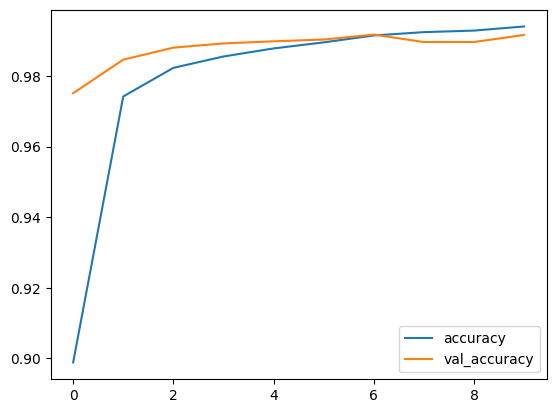

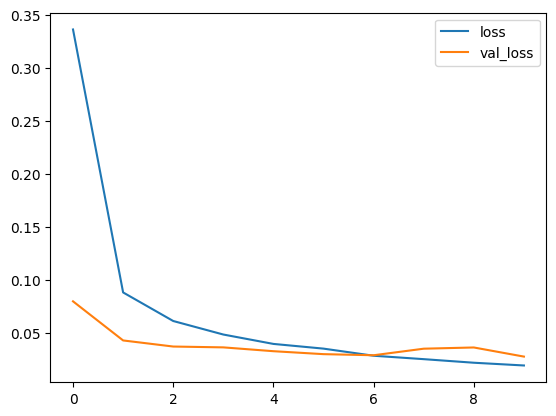

In [8]:
history=model.fit(x_train,y_train2,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test2),validation_split=0.2)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [9]:
print('針對測試資料進行驗證')
score=model.evaluate(x_test,y_test2,verbose=1)
print('測試資料的 loss:',score[0])
print('測試資料的 accuracy:',score[1])
print('模型儲存')
model.save('minist_model.h5')

針對測試資料進行驗證
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9895 - loss: 0.0313


測試資料的 loss: 0.02739666774868965
測試資料的 accuracy: 0.991599977016449
模型儲存
